## Summary

In [2]:
import pandas as pd

df=pd.DataFrame.from_dict(df)

In [3]:
print("Shape of the Dataframe: ", df.shape)

Shape of the Dataframe:  (17963, 13)


In [4]:
print("First 5 rows:")
print(df.head())

First 5 rows:
                                    name                        location  \
0              a&o Dortmund Hauptbahnhof  Dortmund City Centre, Dortmund   
1                     Moxy Dortmund City                        Dortmund   
2                            NH Dortmund                        Dortmund   
3  Hotel Excelsior Dortmund Hauptbahnhof                        Dortmund   
4                           LivInn Hotel  Dortmund City Centre, Dortmund   

        price        date  stars  km_from_center  num_external_reviews  \
0   61.929116  2024-02-01      0           400.0                  4057   
1  122.247783  2024-02-01      3             1.1                   676   
2  123.256347  2024-02-01      4           450.0                  3768   
3   60.123460  2024-02-01      0             1.0                  2952   
4  110.226344  2024-02-01      3             0.7                  2995   

   booking_user_ratings  avg_user_ratings  airport_taxi  \
0                     0  

In [5]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
              price         stars  km_from_center  num_external_reviews  \
count  17963.000000  17963.000000    17963.000000          17963.000000   
mean     123.311975      1.378834       77.659506           1459.239492   
std      149.315412      1.723076      150.652046           1477.179384   
min       39.822032      0.000000        0.600000              0.000000   
25%       74.145761      0.000000        1.100000            308.000000   
50%       92.186052      0.000000        3.100000           1039.000000   
75%      124.573988      3.000000       10.000000           2025.000000   
max     3507.266921      4.000000      500.000000           7513.000000   

       booking_user_ratings  avg_user_ratings  airport_taxi  \
count          17963.000000      17963.000000  17963.000000   
mean               1.588320          7.789035      0.000056   
std                1.064835          0.866319      0.007461   
min                0.000000          4.600000   

In [6]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
name                        0
location                    0
price                       0
date                        0
stars                       0
km_from_center              0
num_external_reviews        0
booking_user_ratings        0
avg_user_ratings            0
airport_taxi                0
travel_sustainable_level    0
has_free_cancelation        0
town_location               0
dtype: int64


### Calculate the mean price of each town

In [7]:
df_mean_price_by_town = df["price"].groupby(df['town_location'].str.split().str[-1]).mean()
df_mean_price_by_town.head()

town_location
Dortmund    123.311975
Name: price, dtype: float64

# Data Cleaning

## Handling outliers
### Visualize distribution and boxplots to identify outliers

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

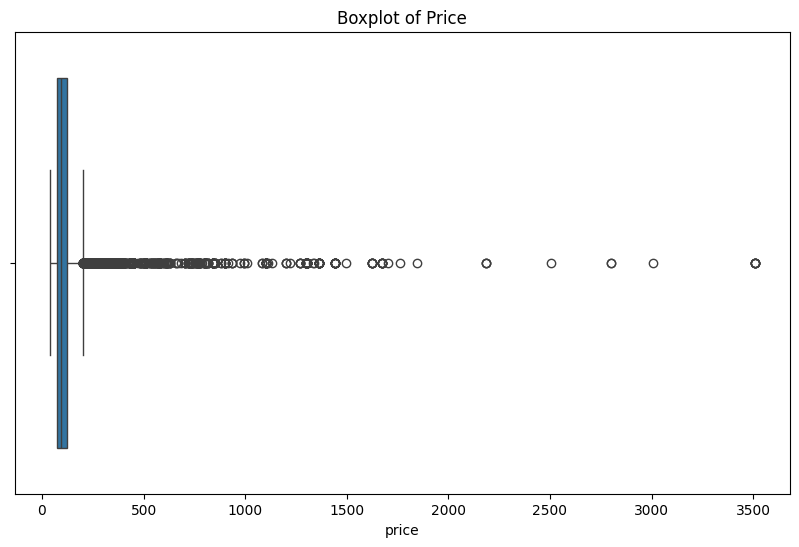

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()

### Remove outliers

In [10]:
import numpy as np

price_column = df['price']
Q1 = price_column.quantile(0.25)
Q3 = price_column.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
lower_bound = lower_bound if lower_bound > 0 else 0
upper_bound = Q3 + 1.5 * IQR

outliers = (price_column < lower_bound) | (price_column > upper_bound)
price_mean = df['price'].mean()
df = df[~outliers]

In [11]:
print(f"Upper bound is: {upper_bound}, lower bound is: {lower_bound}. Mean is: {price_mean}")

Upper bound is: 200.21632835999998, lower bound is: 0. Mean is: 123.31197496126819


In [12]:
df['price'].mean()

96.75031088705164

In [13]:
import plotly.express as px

if df_name == "all":
    trace = []
    colors = ['blue', 'red', 'green']
    towns = df["town_location"].unique()
    for i, town in enumerate(towns):
        trace.append(px.line(df[df['town_location']==town], x="date", y="price", title='Hotel Demands', line_group='date', labels={'price': town}))
        trace[i].update_traces(line=dict(color=colors[i]))


    fig = px.line(df[df['town_location']==towns[0]], x="date", y="price", title=f'Hotel Demands in {towns[0]} vs {towns[1]} vs {towns[2]}')

    fig.add_traces(trace[1].data)
    fig.add_traces(trace[2].data)

    fig.show()

In [14]:
import plotly.express as px

fig = px.line(df, x="date", y="price", title=f'Hotel Demands in {df_name}')
fig.show()

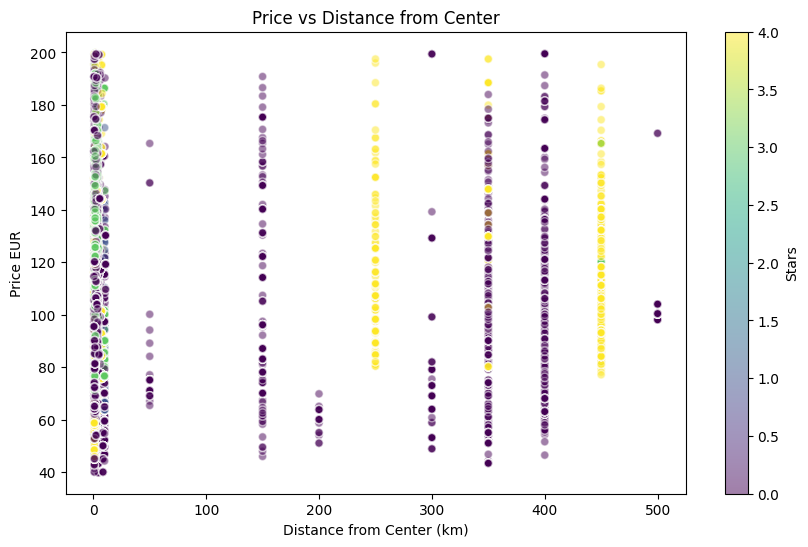

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['km_from_center'], df['price'], c=df['stars'], cmap='viridis', alpha=0.5, edgecolors='w')

plt.xlabel('Distance from Center (km)')
plt.ylabel('Price EUR')
plt.title('Price vs Distance from Center')

cbar = plt.colorbar()
cbar.set_label('Stars')

plt.show()

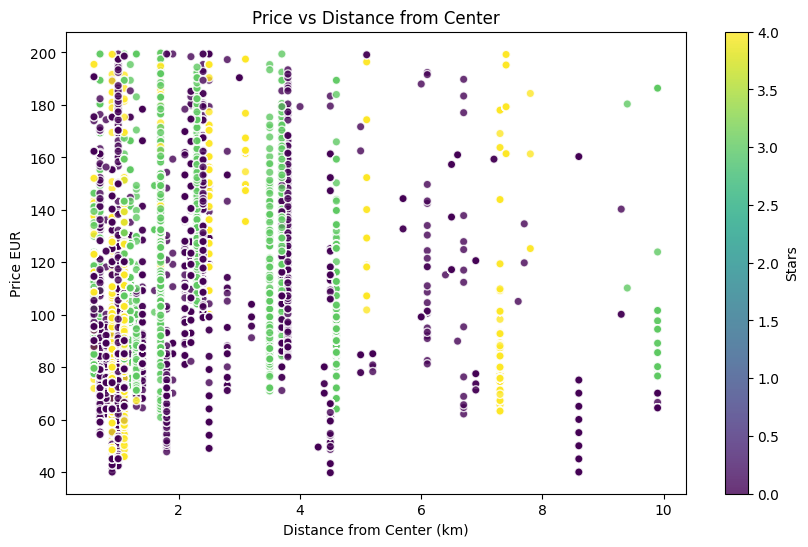

In [16]:
filtered_df = df[df['km_from_center'] < 10]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['km_from_center'], filtered_df['price'], c=filtered_df['stars'], cmap='viridis', alpha=0.8, edgecolors='w')

plt.xlabel('Distance from Center (km)')
plt.ylabel('Price EUR')
plt.title('Price vs Distance from Center')

cbar = plt.colorbar()
cbar.set_label('Stars')

plt.show()

## Binning
Binning 'price' into categories (low, medium, high).

In [17]:
mean_price = df['price'].median()
mean_price

89.40436632000001

In [18]:
bins = [0, 80, 140, np.inf]
labels = ['Low', 'Medium', 'High']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)
print(df[['price', 'price_category']])

            price price_category
0       61.929116            Low
1      122.247783         Medium
2      123.256347         Medium
3       60.123460            Low
4      110.226344         Medium
...           ...            ...
17957   87.582443         Medium
17958  190.748835           High
17959  119.254623         Medium
17960  190.390958           High
17961   84.768223         Medium

[16677 rows x 2 columns]



Count of Data Points in Each Category:
price_category
Medium    8528
Low       6133
High      2016
Name: count, dtype: int64


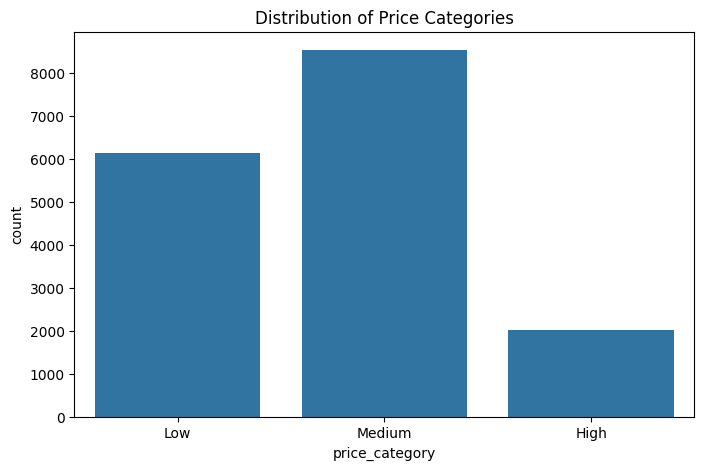

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='price_category', data=df)
plt.title('Distribution of Price Categories')

print("\nCount of Data Points in Each Category:")
print(df['price_category'].value_counts())

plt.show()

In [20]:
df.groupby('price_category').agg({'price': ['mean', 'median'], 'stars': 'mean', 'avg_user_ratings': 'mean'})

/var/folders/tw/dszf86bn0kjgzxp0v_8g35sc0000gn/T/ipykernel_78099/1376830910.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



price                 stars avg_user_ratings
                      mean      median      mean             mean
price_category                                                   
Low              65.556393   66.435122  0.755585         7.371394
Medium          103.368017  100.205767  1.704855         8.000719
High            163.653338  161.435395  1.943452         8.097607

# EDA (Exploratory Data Analysis)
## Visualize relationships between variables

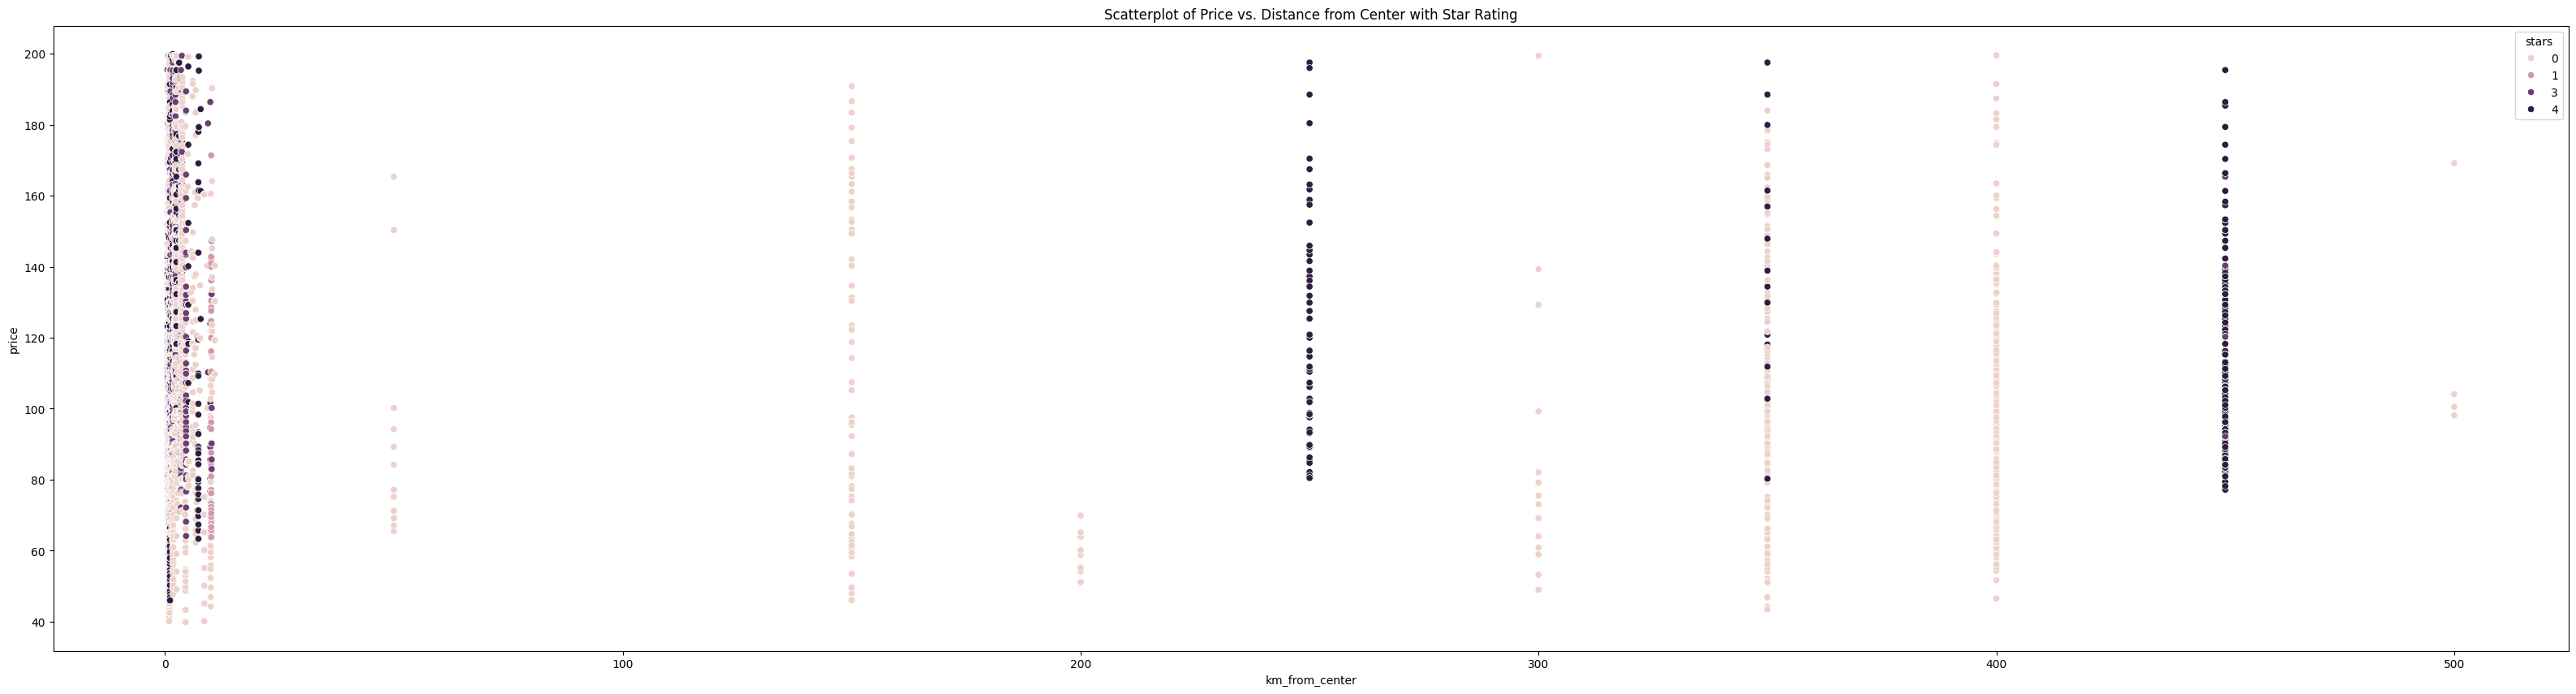

In [21]:
plt.figure(figsize=(40, 10))
df['km_from_center'] = pd.to_numeric(df['km_from_center'], errors='coerce')

df_sorted = df.sort_values(by='km_from_center')

sns.scatterplot(x='km_from_center', y='price', hue='stars', data=df_sorted)
plt.title('Scatterplot of Price vs. Distance from Center with Star Rating')
plt.show()

### According to the Boxplot and EDA analysis we just did it is clear that there are some outliers we need to handle. Namely price and km_from_center

In [22]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [23]:
threshold = 20
df_filtered = df[df['km_from_center'] < threshold]

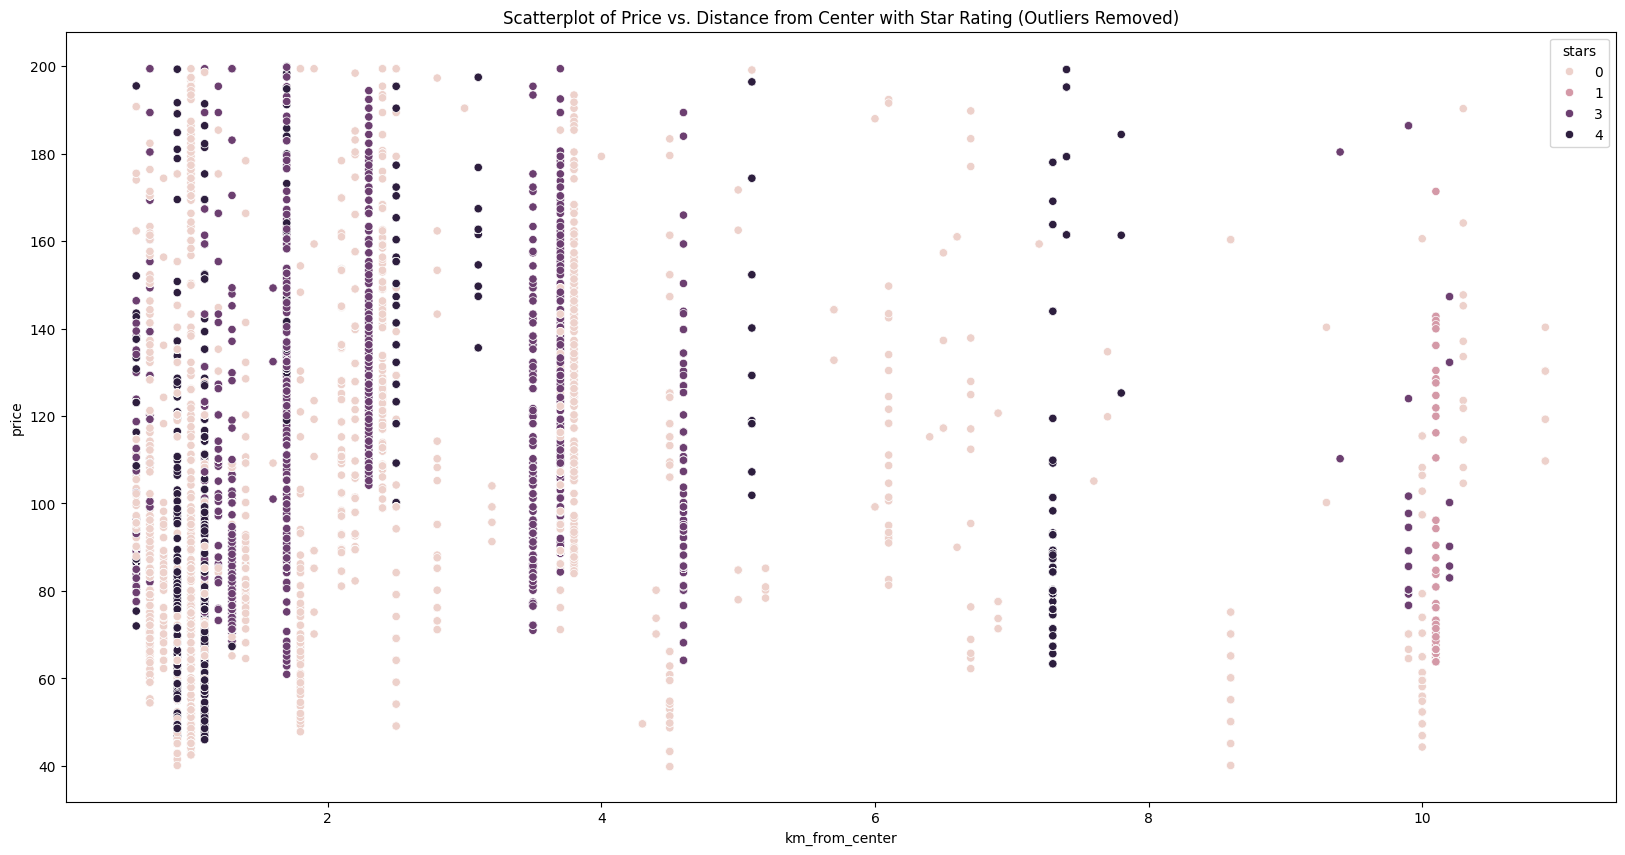

In [24]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='km_from_center', y='price', hue='stars', data=df_filtered)
plt.title('Scatterplot of Price vs. Distance from Center with Star Rating (Outliers Removed)')
plt.show()

## We can also see what the most frequent price is

<Figure size 1000x600 with 0 Axes>

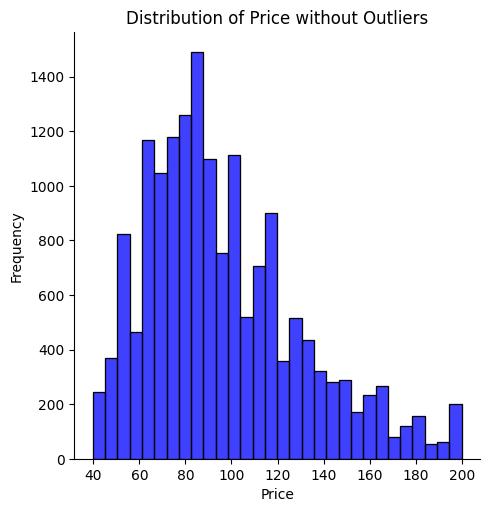

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.displot(df['price'], bins=30, kde=False, color='blue')
plt.title('Distribution of Price without Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

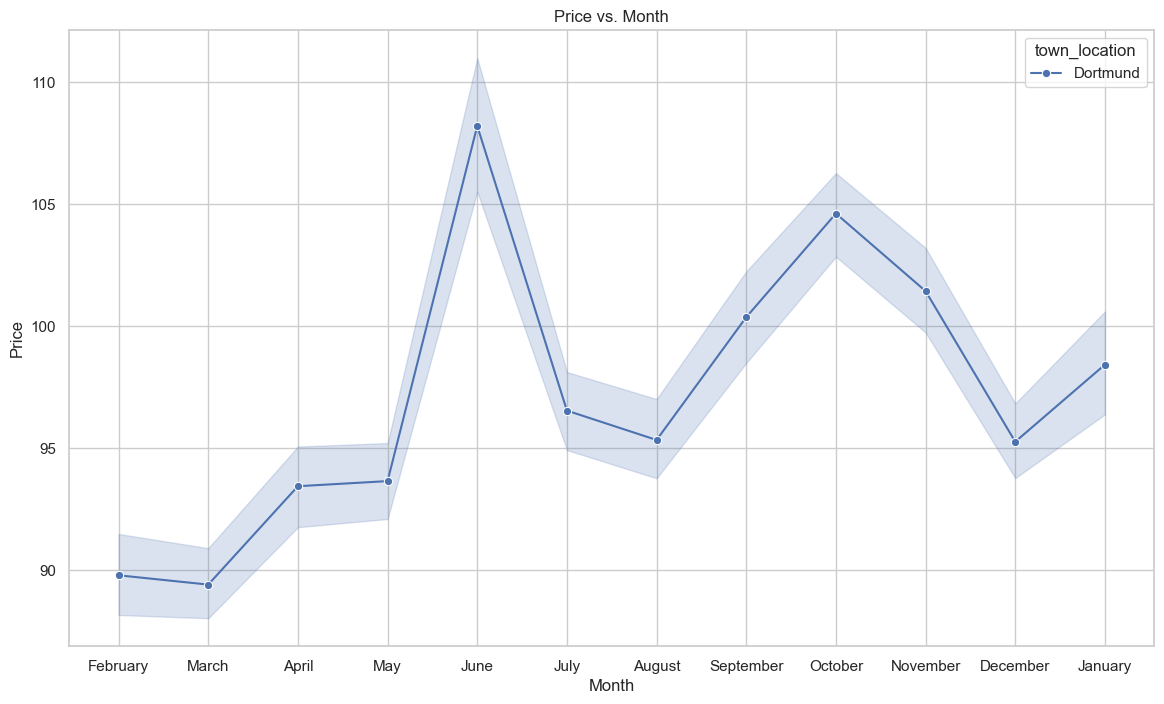

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.strftime('%B')

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.lineplot(x='month', y='price',hue='town_location', data=df, sort=False, marker='o', color='red')
plt.title('Price vs. Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()


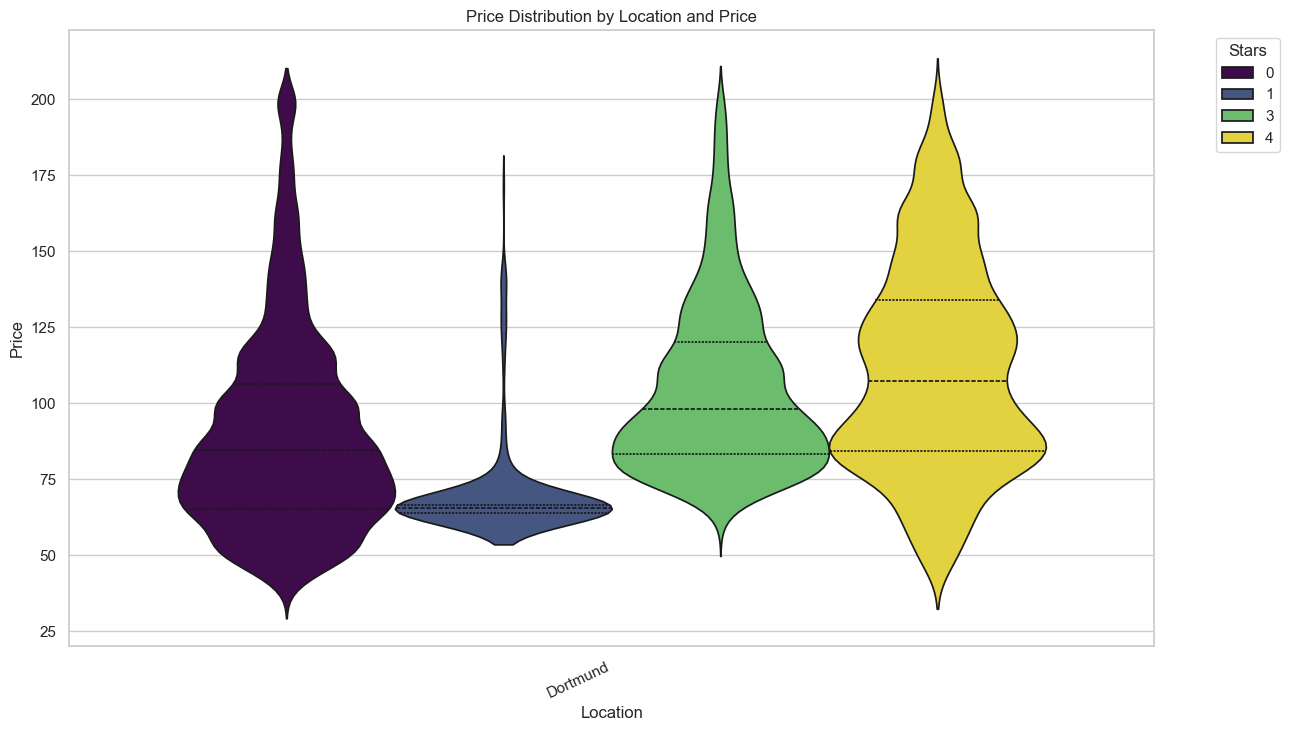

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.violinplot(x='town_location', y='price', hue='stars', data=df, palette='viridis', inner='quartile')
plt.title('Price Distribution by Location and Price')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=25, ha='right') 
plt.legend(title='Stars', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()


In [28]:
df.to_csv('hotels_preprocessed_'+ df_name +'.csv', index=False)